In [1]:
import pyfair

In [2]:
    from pyfair import FairModel
    

    # Create an incomplete model
    model = FairModel('Tree Test')
    model.input_data('Loss Event Frequency', mean=5, stdev=1)
    model.calculate_all()
    
 

FairException: Not ready for calculation. See statuses: 
Risk                                  Required
Loss Event Frequency                  Supplied
Threat Event Frequency            Not Required
Contact                           Not Required
Action                            Not Required
Vulnerability                     Not Required
Control Strength                  Not Required
Threat Capability                 Not Required
Loss Magnitude                        Required
Primary Loss                          Required
Secondary Loss                        Required
Secondary Loss Event Frequency        Required
Secondary Loss Event Magnitude        Required
dtype: object

In [5]:
import scipy.stats as stats

s = stats.norm(loc=100, scale=50)
s.rvs(3)

array([198.47586524, 150.11389796,  86.89533848])

In [15]:
import pandas as pd

pd.Series([
    10_512_018,
    0,
    3_841_190
]).std()

5319104.079542093

In [11]:
import scipy.stats as stats

import matplotlib

import matplotlib.pyplot as plt

%matplotlib inline
#matplotlib.style.use('fivethirtyeight')

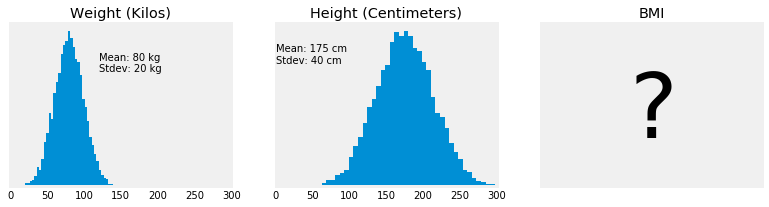

In [12]:
fig, axes = plt.subplots(1,3)

heights = stats.norm.rvs(loc=175, scale=40, size=10_000)
weights = stats.norm.rvs(loc=80, scale=20, size=10_000)

# Height
axes[1].hist(heights, bins=50)
axes[1].set_title('Height (Centimeters)')
axes[1].set_xlim((0, 300))
axes[1].grid(False)
axes[1].text(0,500, 'Mean: 175 cm\nStdev: 40 cm')
axes[1].yaxis.set_ticks([])

# Weight
axes[0].hist(weights, bins=50)
axes[0].set_title('Weight (Kilos)')
axes[0].set_xlim((0, 300))
axes[0].grid(False)
axes[0].text(120,500, 'Mean: 80 kg\nStdev: 20 kg')
axes[0].yaxis.set_ticks([])

# BMI
axes[2].set_title('BMI')

axes[2].xaxis.set_ticks([])
axes[2].yaxis.set_ticks([])
axes[2].text(.4,.3,'?', fontsize=90)

fig.set_size_inches(12, 3)


$
\Large{\text{BMI}} = \huge{
    \frac
        {\text{Weight}_{kg}}
        {(\text{Height}_{cm} \times .01) ^2}
}
$

In [6]:
80 / (150 * .01) ** 2

35.55555555555556

In [ ]:
5 + 5

In [7]:
import pandas as pd
import scipy.stats as stats

heights = stats.norm.rvs(loc=175, scale=40, size=3)
weights = stats.norm.rvs(loc=80, scale=20, size=3)

df = pd.DataFrame({'height': heights, 'weight':weights})

In [8]:
def get_bmi(row):
    h = row['height']
    w = row['weight']
    bmi = w / (h * .01) ** 2
    return bmi

df['bmi'] = df.apply(get_bmi, axis=1)
df

,height,weight,bmi
0,164.606021,63.909336,23.587009
1,230.353776,74.972730,14.129040
2,246.915053,58.501501,9.595594


In [ ]:


heights = pd.Series(stats.norm.rvs(loc=175, scale=40, size=10_000))
weights = pd.Series(stats.norm.rvs(loc=80, scale=20, size=10_000))
df = pd.DataFrame({'height': heights, 'weight':weights})
df['bmi'] = df.apply(get_bmi, axis=1)
df = df.round(2)
bmis = df['bmi']


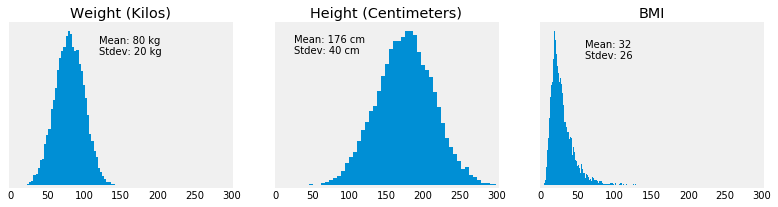

In [41]:
fig, axes = plt.subplots(1,3)

# Height
axes[1].hist(heights, bins=50)
axes[1].set_title('Height (Centimeters)')
axes[1].set_xlim((0, 300))
axes[1].grid(False)
axes[1].text(25,480, 'Mean: {} cm\nStdev: {} cm'.format(round(heights.mean()), round(heights.std())))
axes[1].yaxis.set_ticks([])

# Weight
axes[0].hist(weights, bins=50)
axes[0].set_title('Weight (Kilos)')
axes[0].set_xlim((0, 300))
axes[0].grid(False)
axes[0].text(120,500, 'Mean: {} kg\nStdev: {} kg'.format(round(weights.mean()), round(weights.std())))
axes[0].yaxis.set_ticks([])

# BMI
axes[2].set_title('BMI')
axes[2].hist(bmis, bins=1000)
axes[2].set_xlim((0, 300))
axes[2].grid(False)
axes[2].text(60, 210, 'Mean: {}\nStdev: {}'.format(round(bmis.mean()), round(bmis.std())))
axes[2].yaxis.set_ticks([])

fig.set_size_inches(12, 3)

In [24]:
bmis

array([20.99692202, 23.99979115, 23.02600969, ..., 42.82278335,
       14.7383338 , 24.56640589])